# Check dataflow

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import os 
import sys

In [3]:
root_path = os.path.abspath("..")
if root_path not in sys.path:
    sys.path.append(root_path)

In [4]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [5]:
from common.dataflow import get_train_df, get_test_df, get_image, get_target, get_inc_angle
from common.dataflow_visu_utils import display_image
from common.dataflow import IcebergDataset

In [6]:
from common.dataflow_visu_utils import display_dataset, display_data_augmentations, display_batches

In [7]:
trainval_ds = IcebergDataset('Train')
test_ds = IcebergDataset('Test')

x:  <class 'numpy.ndarray'> (75, 75, 2) -24.4299 -5.4308 -30.6326 -15.6907
y:  <class 'int'> 1
x:  <class 'numpy.ndarray'> (75, 75, 2) -18.2012 -0.353335 -28.256 -10.851
y:  <class 'int'> 1
x:  <class 'numpy.ndarray'> (75, 75, 2) -21.7095 -9.9731 -26.9481 -17.6767
y:  <class 'int'> 1
x:  <class 'numpy.ndarray'> (75, 75, 2) -21.4476 -2.94768 -29.8597 -12.855
y:  <class 'int'> 1
x:  <class 'numpy.ndarray'> (75, 75, 2) -24.7204 -10.6932 -31.3658 -15.9448
y:  <class 'int'> 1
x:  <class 'numpy.ndarray'> (75, 75, 2) -21.7819 -4.992 -29.8857 -15.6124
y:  <class 'int'> 1
x:  <class 'numpy.ndarray'> (75, 75, 2) -25.4404 -12.6524 -29.8101 -20.1088
y:  <class 'int'> 1
x:  <class 'numpy.ndarray'> (75, 75, 2) -24.6003 -12.949 -29.0986 -21.5037
y:  <class 'int'> 1
x:  <class 'numpy.ndarray'> (75, 75, 2) -20.0456 7.11009 -28.3317 -11.743
y:  <class 'int'> 1
x:  <class 'numpy.ndarray'> (75, 75, 2) -23.4989 -8.26939 -29.2761 -17.9491
y:  <class 'int'> 1


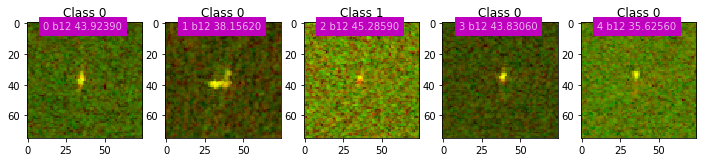

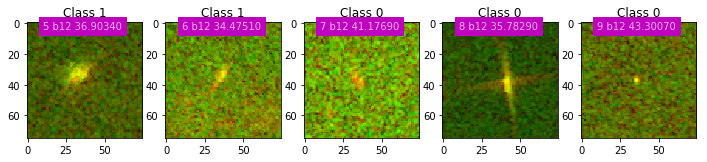

In [9]:
display_dataset(trainval_ds, max_datapoints=10, show_info=True)

In [10]:
%%timeit -r2 -n5
for (x, a), y in trainval_ds:
    x.sum()

1.26 s ± 10.5 ms per loop (mean ± std. dev. of 2 runs, 5 loops each)


x:  <class 'numpy.ndarray'> (75, 75, 2) -26.7006 7.28603 -34.3635 -16.2145
y:  <class 'str'> 8
x:  <class 'numpy.ndarray'> (75, 75, 2) -34.1768 -10.5493 -38.1012 -10.7599
y:  <class 'str'> 8
x:  <class 'numpy.ndarray'> (75, 75, 2) -34.0697 18.9681 -37.5925 19.0644
y:  <class 'str'> 8
x:  <class 'numpy.ndarray'> (75, 75, 2) -27.2938 1.69518 -35.0941 -6.58381
y:  <class 'str'> 8
x:  <class 'numpy.ndarray'> (75, 75, 2) -33.387 -8.12234 -35.8867 -8.77815
y:  <class 'str'> 8
x:  <class 'numpy.ndarray'> (75, 75, 2) -32.5693 6.89931 -30.9879 5.77728
y:  <class 'str'> 8
x:  <class 'numpy.ndarray'> (75, 75, 2) -37.1353 -5.83 -39.6348 -14.7732
y:  <class 'str'> 8
x:  <class 'numpy.ndarray'> (75, 75, 2) -29.9917 3.36454 -36.9303 -13.8703
y:  <class 'str'> 8
x:  <class 'numpy.ndarray'> (75, 75, 2) -33.0868 15.5735 -37.3044 0.552376
y:  <class 'str'> 8
x:  <class 'numpy.ndarray'> (75, 75, 2) -26.622 11.1458 -33.5917 5.93408
y:  <class 'str'> 8


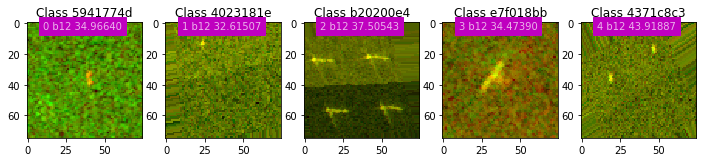

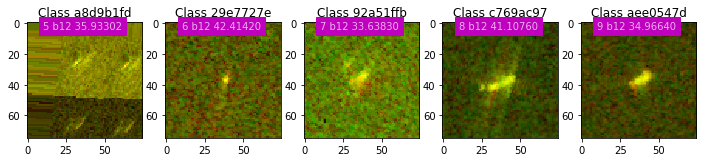

In [14]:
display_dataset(test_ds, max_datapoints=10, show_info=True)

Compute min, max, mean on the train dataset

In [16]:
def compute_min_max_mean(ds):
    min_vals = [] 
    max_vals = []
    mean_vals = []
    for (x, a), y in ds:
        min_vals.append((x[:, :, 0].min(), x[:, :, 1].min()))
        max_vals.append((x[:, :, 0].max(), x[:, :, 1].max()))
        mean_vals.append((x[:, :, 0].mean(), x[:, :, 1].mean()))

    min_vals = np.array(min_vals)
    max_vals = np.array(max_vals)
    mean_vals = np.array(mean_vals)
    return min_vals, max_vals, mean_vals

train_min_vals, train_max_vals, train_mean_vals = compute_min_max_mean(trainval_ds)
test_min_vals, test_max_vals, test_mean_vals = compute_min_max_mean(test_ds)

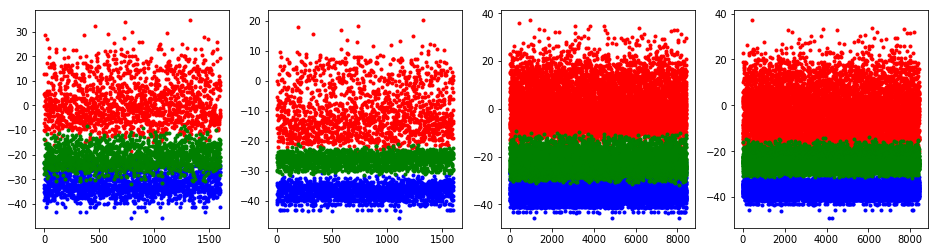

In [18]:
plt.figure(figsize=(16, 4))
plt.subplot(141)
plt.plot(train_min_vals[:, 0], 'b.', label='mins')
plt.plot(train_max_vals[:, 0], 'r.', label='maxs')
plt.plot(train_mean_vals[:, 0], 'g.', label='mean')
plt.subplot(142)
plt.plot(train_min_vals[:, 1], 'b.', label='mins')
plt.plot(train_max_vals[:, 1], 'r.', label='maxs')
plt.plot(train_mean_vals[:, 1], 'g.', label='mean')

plt.subplot(143)
plt.plot(test_min_vals[:, 0], 'b.', label='mins')
plt.plot(test_max_vals[:, 0], 'r.', label='maxs')
plt.plot(test_mean_vals[:, 0], 'g.', label='mean')
plt.subplot(144)
plt.plot(test_min_vals[:, 1], 'b.', label='mins')
plt.plot(test_max_vals[:, 1], 'r.', label='maxs')
plt.plot(test_mean_vals[:, 1], 'g.', label='mean')

In [11]:
np.percentile(mean_vals, q=50.0, axis=0), np.percentile(max_vals, q=97.0, axis=0) - np.percentile(min_vals, q=3.0, axis=0)

(array([-21.04982662, -26.15313911]), array([ 59.87096096,  48.35116971]))

In [8]:
import torch
from common.torch_common_utils.dataflow import TransformedDataset, OnGPUDataLoader
from common.dataflow import get_data_transforms

In [9]:
CONFIG = {
  "train_aug": {
    "Compose": {
      "transforms": [
        {"ToThreeBands": {}},
        {"RandomApply": {"proba": 0.85,
          "transforms": [
            {"RandomAffine": {
              "translate": [0.15, 0.15],
              "interpolation": 2}},
            {"RandomFlip": {"mode": "h", "proba": 0.75}},
            {"RandomFlip": {"mode": "v", "proba": 0.75}}
          ]}
        },
        {"_ToTensor": {}},
        {"_Normalize": {}}
      ]}
  },

  "test_aug": {
    "Compose": {
      "transforms": [
        {"ToThreeBands": {}},
        {"RandomFlip": {"mode": "h", "proba": 0.5}},
        {"RandomFlip": {"mode": "v", "proba": 0.5}},
        {"_ToTensor": {}},
        {"_Normalize": {}}
      ]}
  }
}


train_aug = get_data_transforms(CONFIG['train_aug'])
test_aug = get_data_transforms(CONFIG['test_aug'])

In [39]:
from functools import partial

def normalize_inc_angle(a):
    return (a - 30.0) / (50.0 - 30.0) - 0.5


def x_transform(x, aug_fn):
    x, a = x
    x = x.astype(np.float32)
    x = aug_fn(x)
    a = normalize_inc_angle(a)
    a = a.astype(np.float32)
    return x, a


def x_transform_with_meta(x, aug_fn):
    x, a = x
    x = x.astype(np.float32)
    a = a.astype(np.float32)
    
    x_meta = [a, ]
    for i in range(x.shape[2]):
        x_meta.extend([x[:, :, i].min(), x[:, :, i].mean(), x[:, :, i].max()])
    x_meta = np.array(x_meta, dtype=np.float32)

    x = aug_fn(x)
    return x, x_meta


def y_transform(y):
    return torch.FloatTensor([int(y)])

In [40]:
train_aug_ds = TransformedDataset(trainval_ds, 
                                  x_transforms=partial(x_transform, aug_fn=train_aug), 
                                  y_transforms=y_transform)


train_aug_ds2 = TransformedDataset(trainval_ds, 
                                  x_transforms=partial(x_transform_with_meta, aug_fn=train_aug), 
                                  y_transforms=y_transform)


val_aug_ds = TransformedDataset(trainval_ds, 
                                x_transforms=partial(x_transform, aug_fn=test_aug), 
                                y_transforms=y_transform)

test_aug_ds = TransformedDataset(test_ds, 
                                 x_transforms=partial(x_transform, aug_fn=test_aug))

In [41]:
(x, a), y = train_aug_ds[0]
x.shape

torch.Size([5, 75, 75])

In [43]:
(x, x_meta), y = train_aug_ds2[0]
x.shape, x_meta.shape

<class 'numpy.ndarray'> (75, 75, 2) <class 'numpy.float64'>


(torch.Size([5, 75, 75]), (7,))

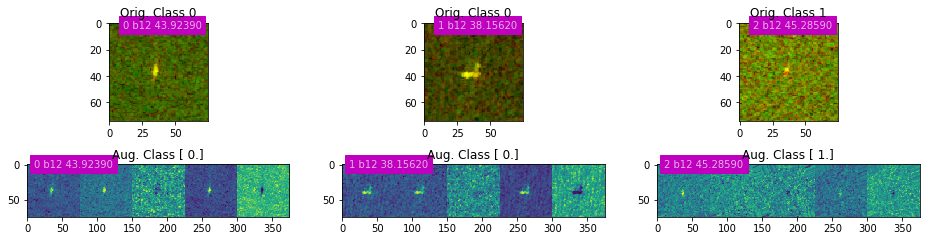

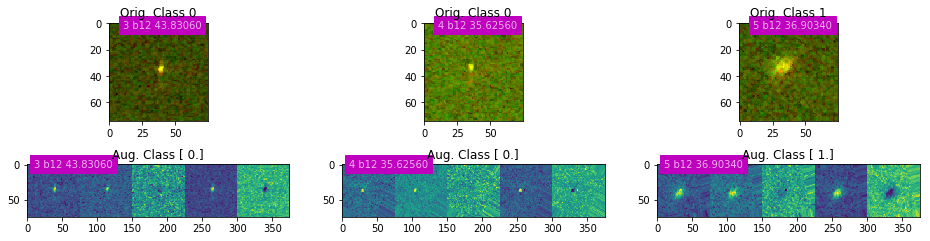

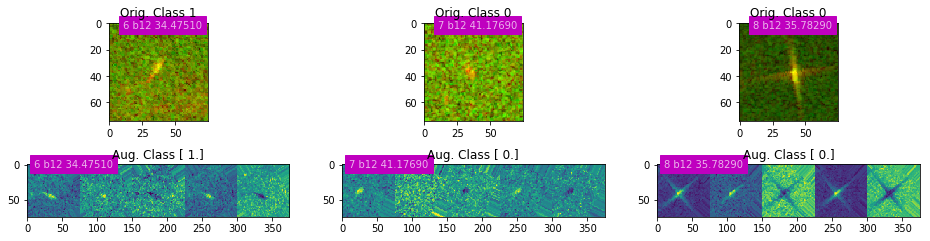

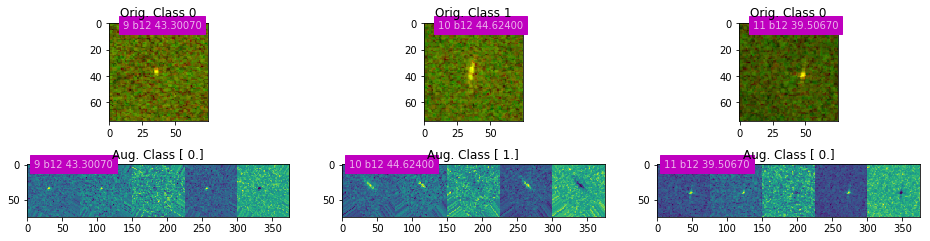

In [15]:
display_data_augmentations(trainval_ds, train_aug_ds, max_datapoints=12, n_cols=3, figsize=(16, 4))

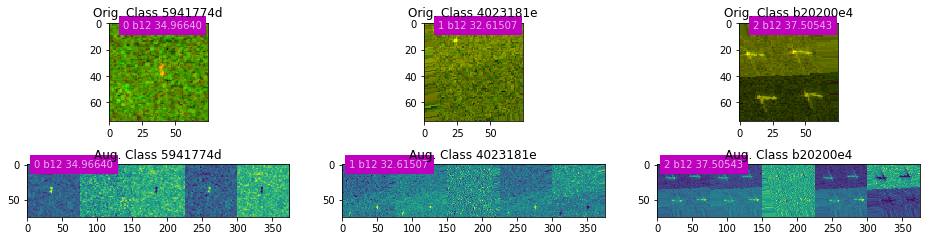

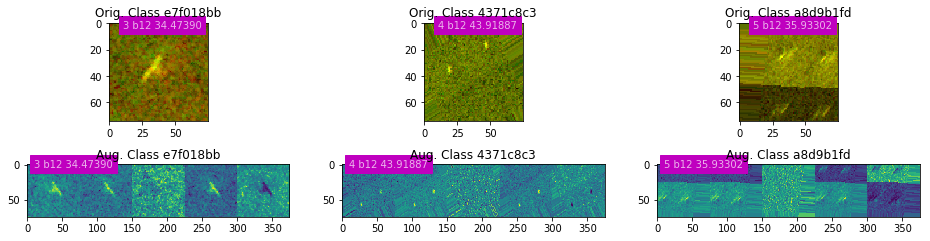

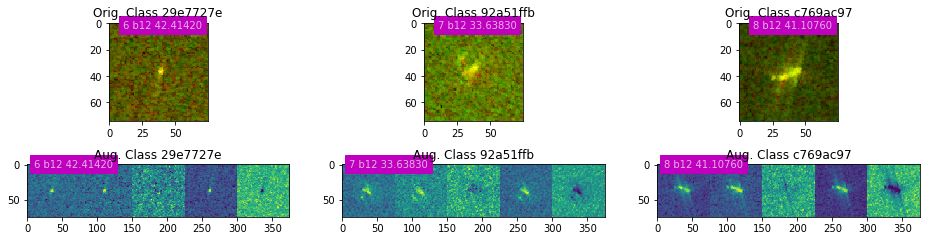

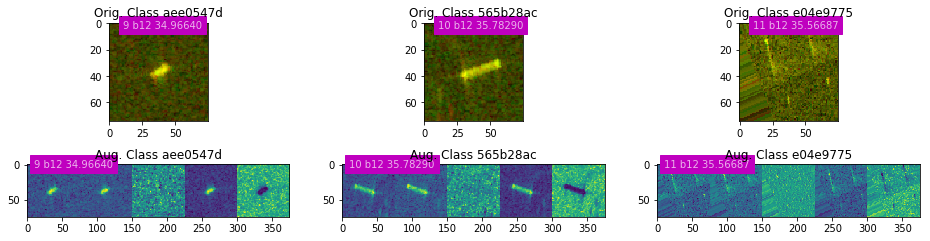

In [16]:
display_data_augmentations(test_ds, test_aug_ds, max_datapoints=12, n_cols=3, figsize=(16, 4))

In [18]:
(x, a), y = train_aug_ds[0]

In [19]:
for i in range(x.size(0)):
    print(torch.min(x[i, :, :]), torch.max(x[i, :, :]))

-0.7642275094985962 -0.004262980073690414
-0.8227183818817139 -0.22504307329654694
-0.2948240041732788 0.18429233133792877
-1.4229241609573364 -0.2581275999546051
-0.498899906873703 0.0060945311561226845


x:  <class 'torch.FloatTensor'> torch.Size([5, 75, 75]) -1.3296297788619995 0.13431678712368011 -1.3025407791137695 0.12041191011667252
y:  <class 'torch.FloatTensor'> torch.Size([1])
x:  <class 'torch.FloatTensor'> torch.Size([5, 75, 75]) -0.9383706450462341 -0.10790889710187912 -0.8747068047523499 -0.06025764346122742
y:  <class 'torch.FloatTensor'> torch.Size([1])
x:  <class 'torch.FloatTensor'> torch.Size([5, 75, 75]) -1.1598846912384033 0.13361209630966187 -1.1169745922088623 0.07401847839355469
y:  <class 'torch.FloatTensor'> torch.Size([1])
x:  <class 'torch.FloatTensor'> torch.Size([5, 75, 75]) -1.1806493997573853 -0.008475685492157936 -1.182562232017517 0.059904977679252625
y:  <class 'torch.FloatTensor'> torch.Size([1])
x:  <class 'torch.FloatTensor'> torch.Size([5, 75, 75]) -1.1306153535842896 0.15360169112682343 -1.204419732093811 0.15360169112682343
y:  <class 'torch.FloatTensor'> torch.Size([1])


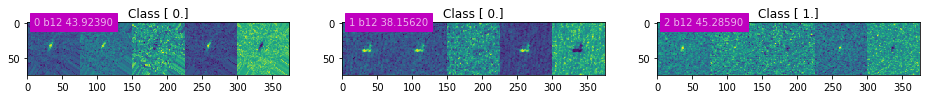

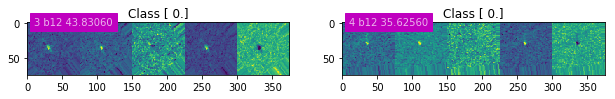

In [20]:
display_dataset(train_aug_ds, max_datapoints=5, n_cols=3, figsize=(16, 4), show_info=True)

x:  <class 'torch.FloatTensor'> torch.Size([5, 75, 75]) -0.957893967628479 -0.04213729873299599 -0.9889182448387146 -0.014484863728284836
y:  <class 'str'> 1
x:  <class 'torch.FloatTensor'> torch.Size([5, 75, 75]) -1.260067105293274 0.1204112246632576 -1.2025043964385986 0.13431605696678162
y:  <class 'str'> 1
x:  <class 'torch.FloatTensor'> torch.Size([5, 75, 75]) -1.1524338722229004 0.08814844489097595 -1.1524338722229004 0.08814844489097595
y:  <class 'str'> 1
x:  <class 'torch.FloatTensor'> torch.Size([5, 75, 75]) -0.9949542284011841 -0.017924919724464417 -0.9902732372283936 -0.0641644299030304
y:  <class 'str'> 1
x:  <class 'torch.FloatTensor'> torch.Size([5, 75, 75]) -1.1669566631317139 0.09590339660644531 -1.1763415336608887 0.09590339660644531
y:  <class 'str'> 1


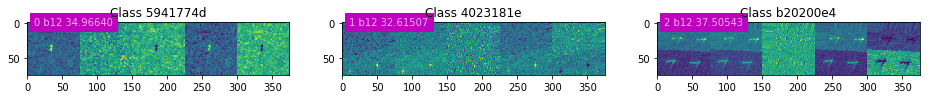

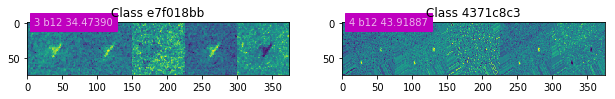

In [22]:
display_dataset(test_aug_ds, max_datapoints=5, n_cols=3, figsize=(16, 4), show_info=True)

In [44]:
CONFIG = {
  "seed": 2017,
  "fold_index": [0, 1, 2, 3, 4],
  "n_splits": 5,

  "batch_size": 32,
  "num_workers": 12,
    
  "train_aug": {
    "Compose": {
      "transforms": [
        {"ToThreeBands": {}},
        {"RandomAffine": {
          "translate": [0.15, 0.15],
          "rotation": [0, 0],
          "scale": [1.0, 1.5],       
          "interpolation": 2}},          
        {"RandomFlip": {"mode": "h", "proba": 0.75}},
        {"RandomFlip": {"mode": "v", "proba": 0.75}},          
        {"_ToTensor": {}},
        {"_Normalize": {}}
      ]}
  },

  "test_aug": {
    "Compose": {
      "transforms": [
        {"ToThreeBands": {}},
        {"RandomFlip": {"mode": "h", "proba": 0.5}},
        {"RandomFlip": {"mode": "v", "proba": 0.5}},
        {"_ToTensor": {}},
        {"_Normalize": {}}
      ]}
  }     
}

# CONFIG = {
#   "seed": 2017,
#   "fold_index": [0, 1, 2, 3, 4],
#   "n_splits": 5,

#   "batch_size": 32,
#   "num_workers": 12,
    
#   "train_aug": {
#     "Compose": {
#       "transforms": [
#         {"ToThreeBands": {}},
#         {"RandomApply": {"proba": 0.85,
#           "transforms": [
#             {"RandomAffine": {
#               "translate": [0.15, 0.15],
#               "interpolation": 2}},
#             {"RandomFlip": {"mode": "h", "proba": 0.75}},
#             {"RandomFlip": {"mode": "v", "proba": 0.75}}
#           ]}
#         },
#         {"_ToTensor": {}},
#         {"_Normalize": {}}
#       ]}
#   },

#   "test_aug": {
#     "Compose": {
#       "transforms": [
#         {"ToThreeBands": {}},
#         {"RandomFlip": {"mode": "h", "proba": 0.5}},
#         {"RandomFlip": {"mode": "v", "proba": 0.5}},
#         {"_ToTensor": {}},
#         {"_Normalize": {}}
#       ]}
#   }     
# }

In [45]:
from common.dataflow import get_trainval_batches_single_class

In [46]:
train_batches, val_batches = get_trainval_batches_single_class(
    train_aug_str=CONFIG["train_aug"],
    test_aug_str=CONFIG["test_aug"],
    fold_index=CONFIG["fold_index"],
    n_splits=CONFIG["n_splits"],
    batch_size=CONFIG["batch_size"],
    num_workers=CONFIG["num_workers"],
    seed=CONFIG["seed"]
)

In [47]:
# y_array = []
# x_array = []
# for i, ((x, a), y) in enumerate(trainval_ds):
#     y_array.append(y)
#     x_array.append(i)    

# from sklearn.model_selection import StratifiedShuffleSplit
# # Stratified split:        
# sssplit = StratifiedShuffleSplit(n_splits=CONFIG['n_splits'], 
#                                  test_size=CONFIG['val_size'], 
#                                  random_state=CONFIG['seed'])
# train_indices, val_indices = next(sssplit.split(x_array, y_array))

# from torch.utils.data.sampler import SubsetRandomSampler
# train_sampler = SubsetRandomSampler(train_indices)
# val_sampler = SubsetRandomSampler(val_indices)

# train_batches = OnGPUDataLoader(train_aug_ds,
#                                 batch_size=CONFIG['batch_size'],
#                                 sampler=train_sampler,
#                                 num_workers=CONFIG['num_workers'],
#                                 drop_last=True,
#                                 pin_memory=True)

# val_batches = OnGPUDataLoader(val_aug_ds,
#                               batch_size=CONFIG['batch_size'],
#                               sampler=val_sampler,
#                               num_workers=CONFIG['num_workers'],
#                               drop_last=True,
#                               pin_memory=True)

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


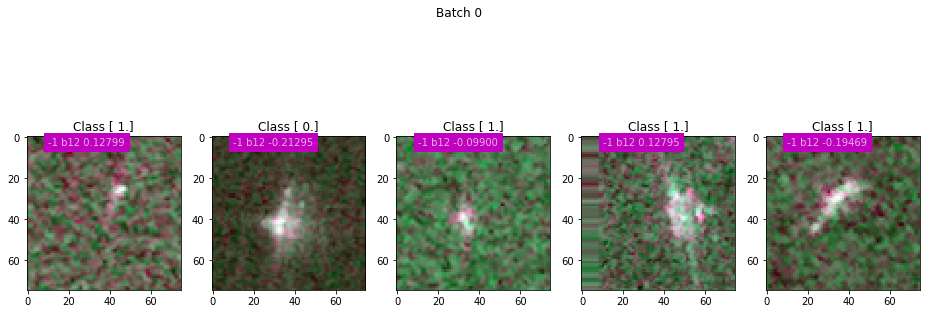

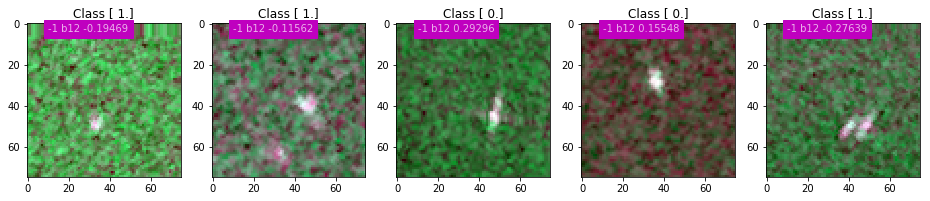

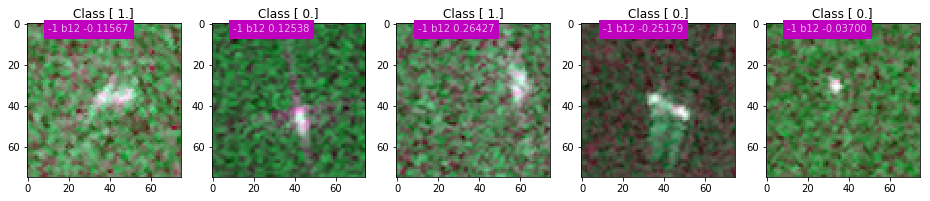

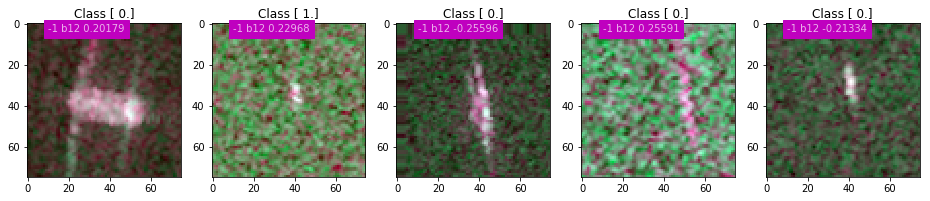

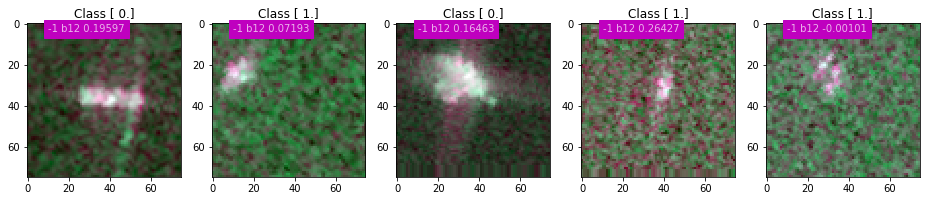

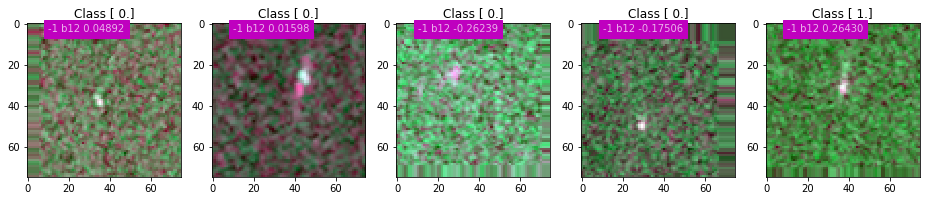

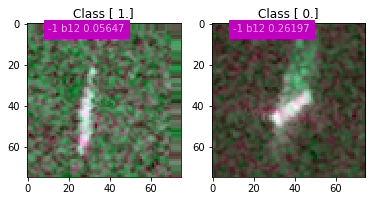

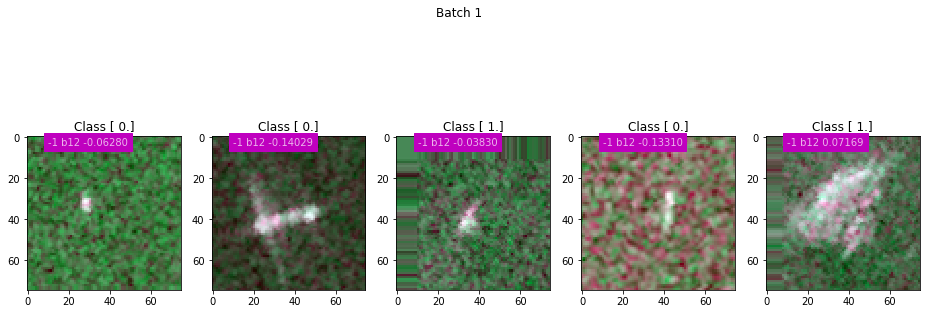

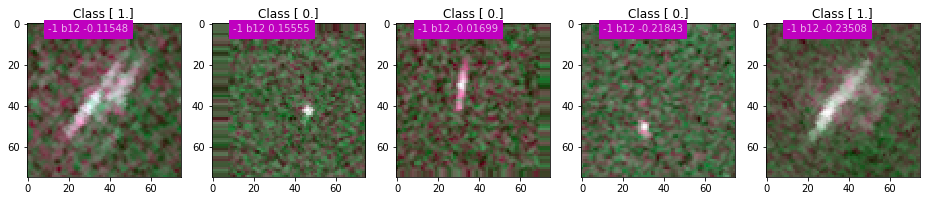

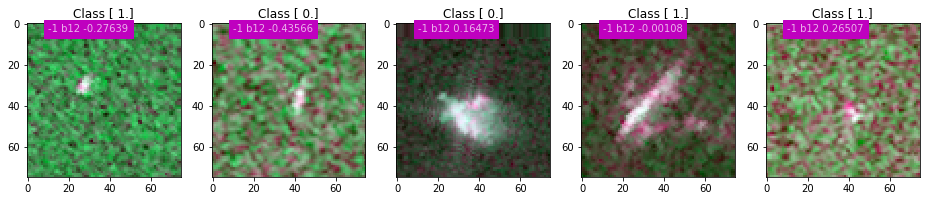

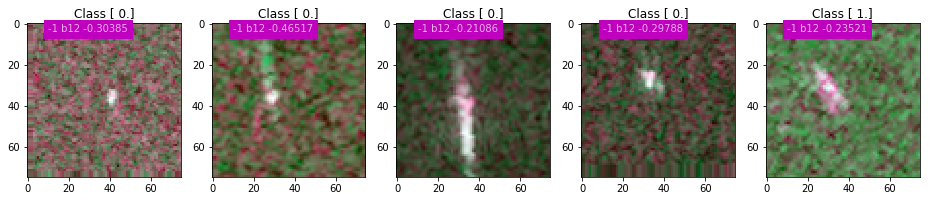

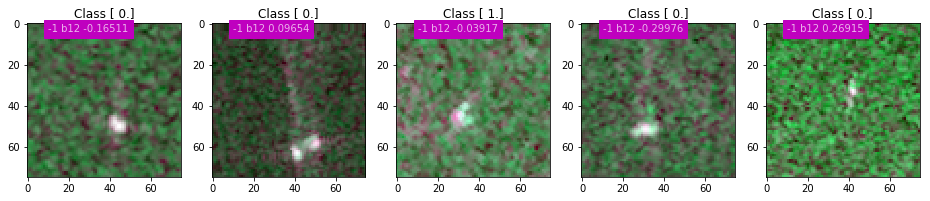

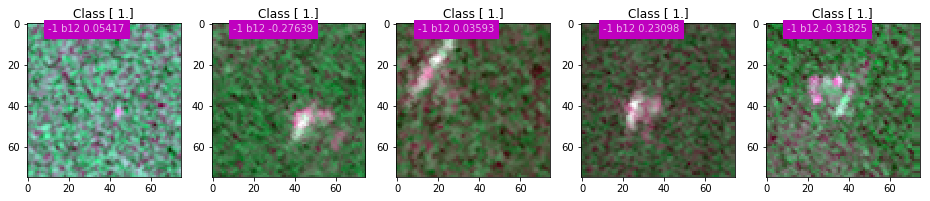

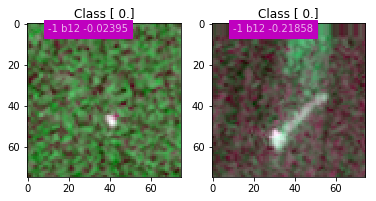

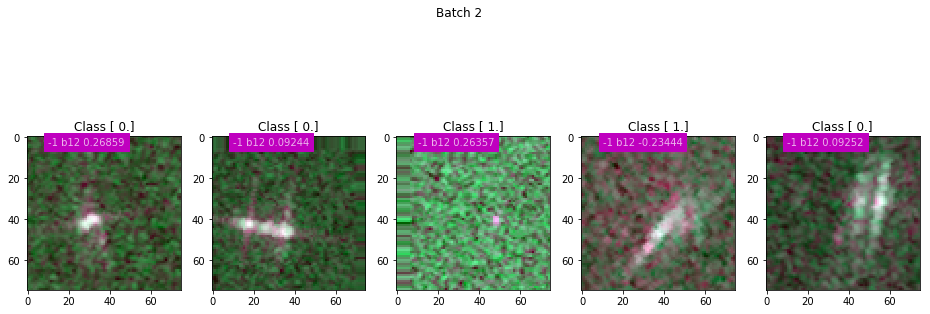

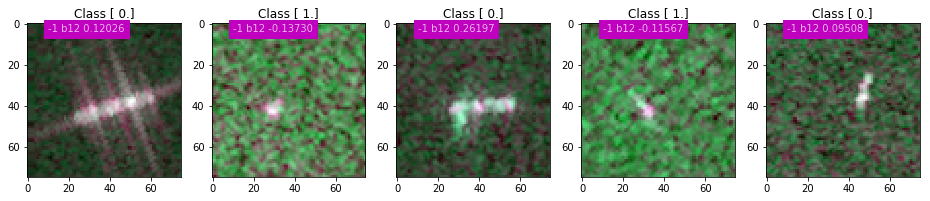

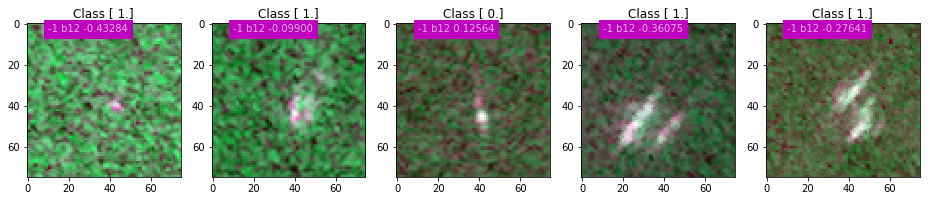

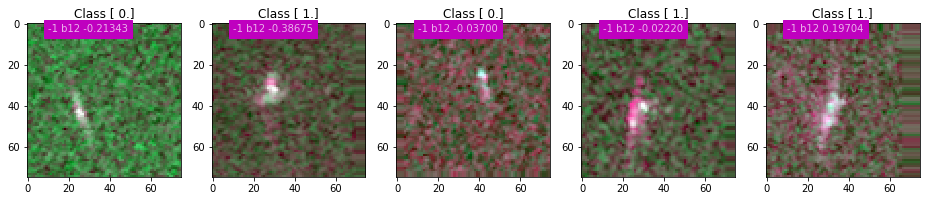

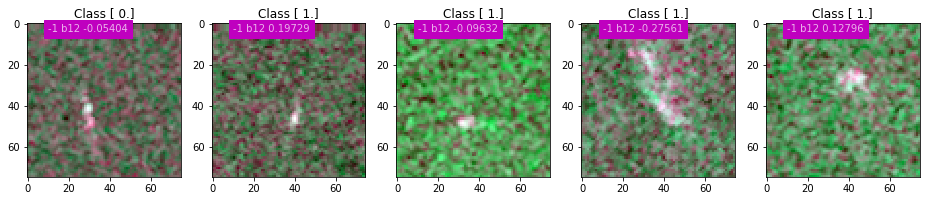

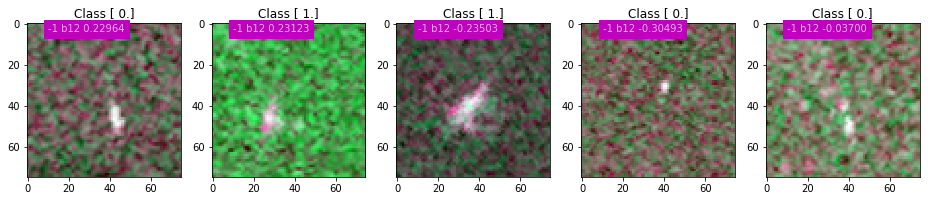

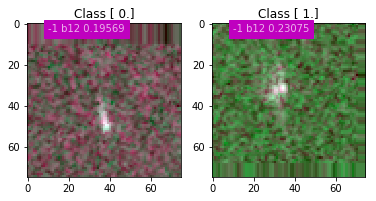

In [49]:
display_batches(train_batches, max_batches=3, n_cols=5)

Check `get_cropped_trainval_batches`

In [7]:
from common.dataflow import get_cropped_trainval_batches, get_data_transforms, get_train_df
from common.dataflow import to_tensor, id_transform, TransformedDataset, x_transform, StratifiedKFold

In [8]:
CONFIG = {
  "train_aug": """{
    "Compose": {
      "transforms": [
        {"ToThreeBands": {}},
        {"RandomApply": {"proba": 0.7,
          "transforms": [
            {"RandomAffine": {
              "translate": [0.15, 0.15],
              "rotation": [-45, 45],
              "interpolation": 0}},
            {"RandomFlip": {"mode": "h", "proba": 0.75}},
            {"RandomFlip": {"mode": "v", "proba": 0.75}}
          ]}
        },
        {"_ToTensor": {}},
        {"_Normalize": {}}
      ]}
  }""",

  "test_aug": """{
    "Compose": {
      "transforms": [
        {"ToThreeBands": {}},
        {"RandomFlip": {"mode": "h", "proba": 0.5}},
        {"RandomFlip": {"mode": "v", "proba": 0.5}},
        {"_ToTensor": {}},
        {"_Normalize": {}}
      ]}
  }"""
}


train_aug = get_data_transforms(CONFIG['train_aug'])
test_aug = get_data_transforms(CONFIG['test_aug'])

In [9]:
from functools import partial
n_splits = 5
fold_index = 0
seed = 12345

In [10]:
trainval_ds = IcebergDataset('Train',
                             limit_n_samples=None,
                             normalized_inc_angle=True,
                             smart_crop_size=48)

train_aug_ds = TransformedDataset(trainval_ds,
                                  x_transforms=partial(x_transform, aug_fn=train_aug),
                                  y_transforms=to_tensor)

val_aug_ds = TransformedDataset(trainval_ds,
                                x_transforms=partial(x_transform, aug_fn=test_aug),
                                y_transforms=to_tensor)


# Integrate size to Kfold stratified split
_trainval_ds = IcebergDataset('Train',
                              limit_n_samples=None,
                              return_object_size_hint=True)
x_array = []
y_array = []
new_classes = {
    (0, 0): 0,
    (0, 1): 1,
    (1, 0): 2,
    (1, 1): 3,
}
for i, ((_, _, is_small), y) in enumerate(_trainval_ds):
    x_array.append(i)
    y = (int(y), int(is_small))
    y_array.append(new_classes[y])

# Stratified split:
train_indices = None
val_indices = None
skf = StratifiedKFold(n_splits=n_splits, random_state=seed)
for i, (train_indices, val_indices) in enumerate(skf.split(x_array, y_array)):
    if i == fold_index:
        break

In [11]:
# Integrate size to Kfold stratified split
_trainval_ds = IcebergDataset('Train',
                              limit_n_samples=None,
                              return_object_size_hint=False)
x_array = []
y_array = []
for i, ((_, _), y) in enumerate(_trainval_ds):
    x_array.append(i)
    y = (int(y), int(is_small))
    y_array.append(new_classes[y])

# Stratified split:
train_indices = None
val_indices = None
skf = StratifiedKFold(n_splits=n_splits, random_state=seed)
for i, (_train_indices, _val_indices) in enumerate(skf.split(x_array, y_array)):
    if i == fold_index:
        break

In [44]:
train_df = get_train_df(with_size_field=True)

In [52]:
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

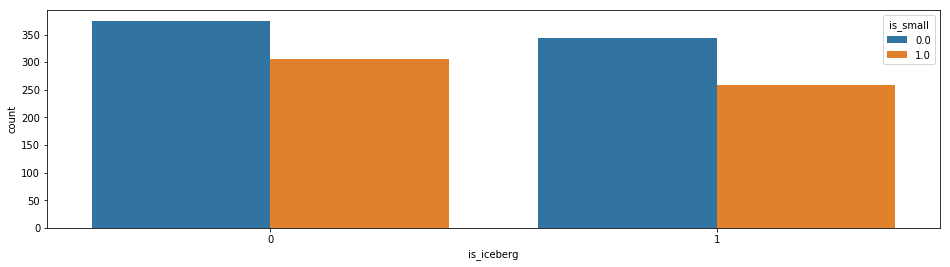

In [63]:
plt.figure(figsize=(16, 4))
sns.countplot(x='is_iceberg', hue='is_small', data=train_df[train_df.index.isin(train_indices)])

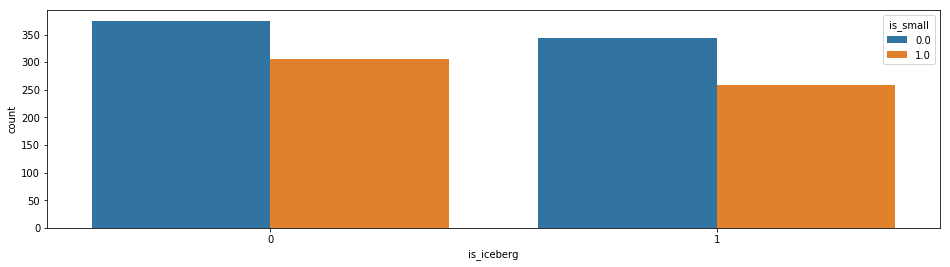

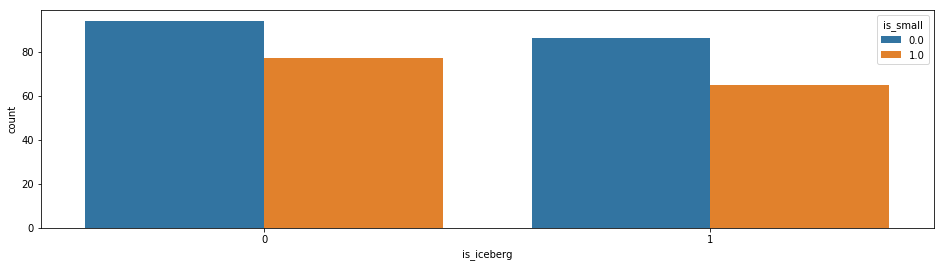

In [64]:
plt.figure(figsize=(16, 4))
sns.countplot(x='is_iceberg', hue='is_small', data=train_df[train_df.index.isin(train_indices)])

plt.figure(figsize=(16, 4))
sns.countplot(x='is_iceberg', hue='is_small', data=train_df[train_df.index.isin(val_indices)])

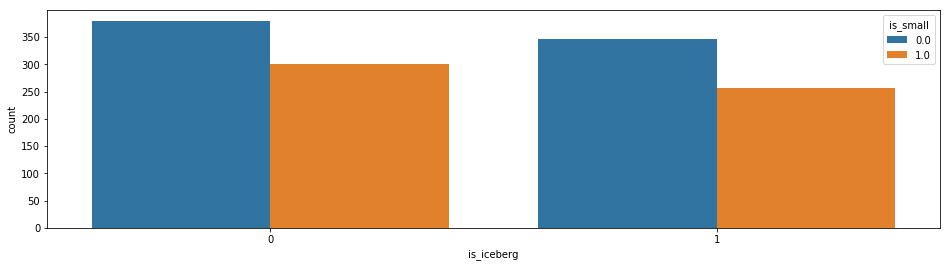

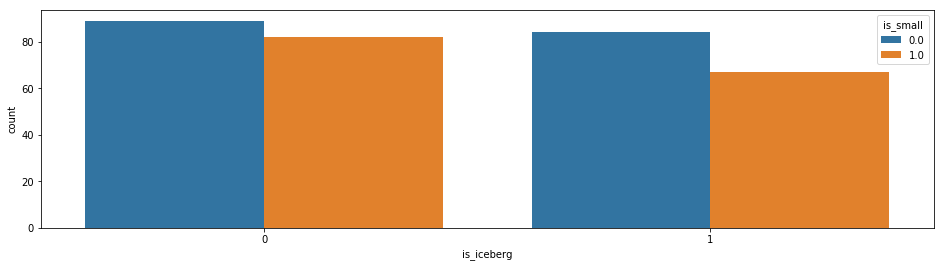

In [65]:
plt.figure(figsize=(16, 4))
sns.countplot(x='is_iceberg', hue='is_small', data=train_df[train_df.index.isin(_train_indices)])

plt.figure(figsize=(16, 4))
sns.countplot(x='is_iceberg', hue='is_small', data=train_df[train_df.index.isin(_val_indices)])

## Check multi-input dataflow

In [12]:
from common.dataflow import get_trainval_multiinput_batches, get_trainval_batches_single_class

In [13]:
train_aug_str = """
    {"Compose": {
      "transforms": [
        {"ToThreeBands": {}},
        {"RandomApply": {"proba": 0.7,
          "transforms": [
            {"RandomAffine": {
              "translate": [0.15, 0.15],
              "rotation": [0, 0],
              "interpolation": 0}},
            {"RandomFlip": {"mode": "h", "proba": 0.75}},
            {"RandomFlip": {"mode": "v", "proba": 0.75}}
          ]}
        }
      ]}}"""

test_aug_str = """{
    "Compose": {
      "transforms": [
        {"ToThreeBands": {}},
        {"RandomFlip": {"mode": "h", "proba": 0.5}},
        {"RandomFlip": {"mode": "v", "proba": 0.5}}
      ]}}"""


fold_index = 0
n_splits = 5
batch_size = 10
num_workers = 1

In [14]:
train_batches, val_batches = get_trainval_multiinput_batches(train_aug_str, 
                                                             test_aug_str, 
                                                             fold_index, 
                                                             n_splits, 
                                                             batch_size, 
                                                             num_workers)

In [15]:
train_batches_iter = iter(train_batches)

In [16]:
batch_x, batch_y = next(train_batches_iter)

In [17]:
len(batch_x), len(batch_x[0]), type(batch_x[0]), len(batch_x[0][0]), type(batch_x[0][0]), batch_x[0][0].shape 

(3, 2, list, 10, torch.cuda.FloatTensor, torch.Size([10, 3, 75, 75]))

In [18]:
import torch

print(torch.min(batch_x[0][0]), torch.max(batch_x[0][0]), batch_x[0][0].shape, type(batch_x[0][0]))
print(torch.min(batch_x[1][0]), torch.max(batch_x[1][0]), batch_x[1][0].shape, type(batch_x[1][0]))
print(torch.min(batch_x[2][0]), torch.max(batch_x[2][0]), batch_x[2][0].shape, type(batch_x[2][0]))

-50.91828155517578 3.994567394256592 torch.Size([10, 3, 75, 75]) <class 'torch.cuda.FloatTensor'>
0.0 1.0 torch.Size([10, 1, 75, 75]) <class 'torch.cuda.FloatTensor'>
0.0 1.0000001192092896 torch.Size([10, 2, 75, 75]) <class 'torch.cuda.FloatTensor'>


In [55]:
from common.torch_common_utils.dataflow_visu_utils import _to_ndarray, _to_str

def display_batches_(batches_ds, max_batches=3, n_cols=5, figsize=(12, 5), suptitle_prefix=""):
    for i, (mbatch_x, batch_y) in enumerate(batches_ds):
        
        for (batch_x, batch_a) in mbatch_x:
            plt.figure(figsize=figsize)
            plt.suptitle(suptitle_prefix + "Batch %i" % i)
            for j in range(len(batch_x)):
                if j > 0 and j % n_cols == 0:
                    plt.figure(figsize=figsize)

                x = batch_x[j, ...]
                y = batch_y[j, ...] if isinstance(batch_y, np.ndarray) else batch_y[j]
                
                x = _to_ndarray(x)
                y = _to_str(y)
                
                ax = plt.subplot(1, n_cols, (j % n_cols) + 1)
                display_image(ax, x, -1, 'b12', batch_a[j])
                plt.title("Class {}".format(y))            
            
        max_batches -= 1
        if max_batches == 0:
            break

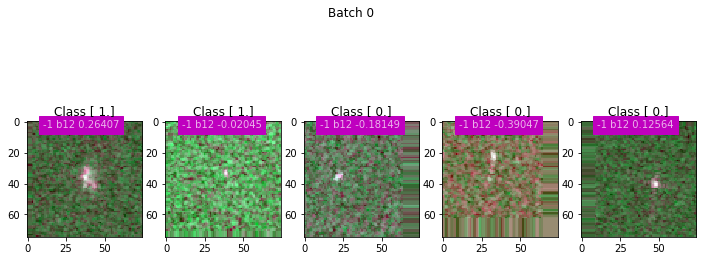

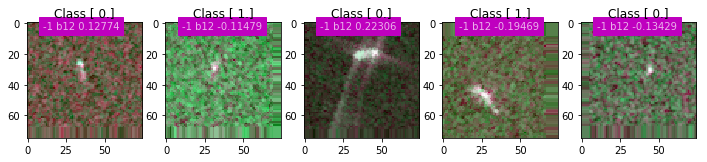

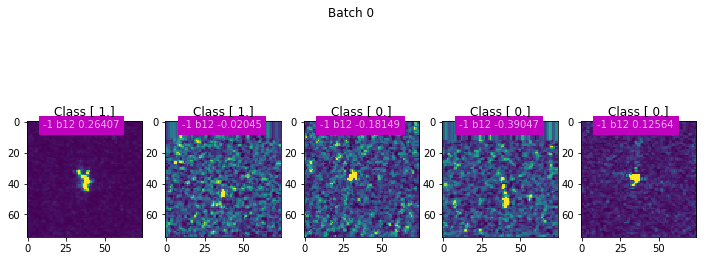

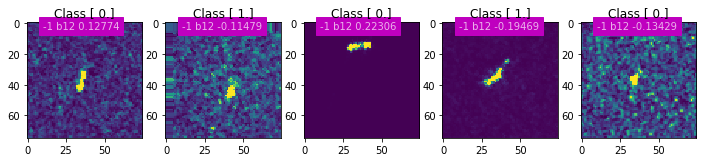

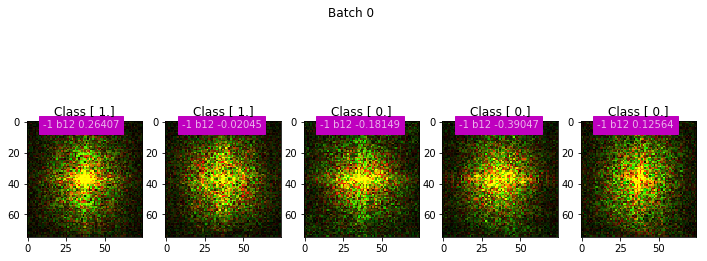

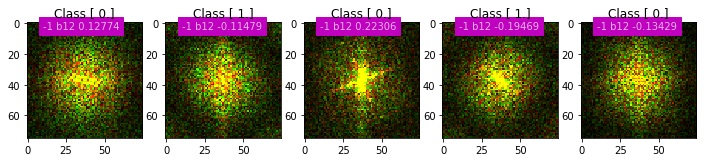

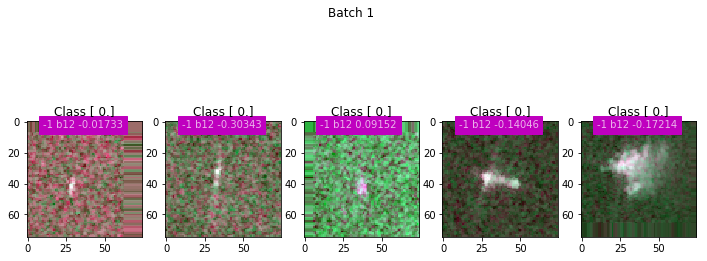

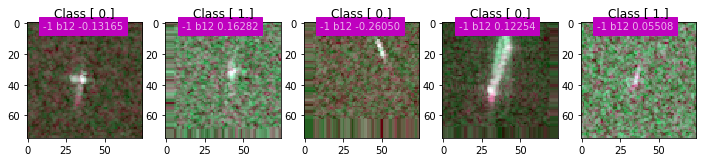

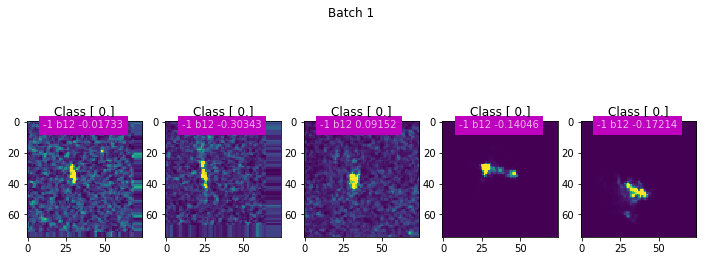

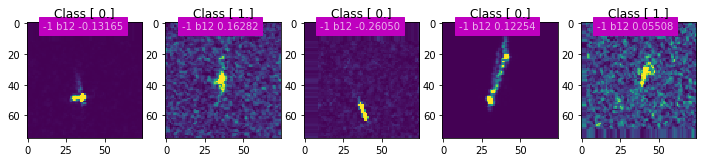

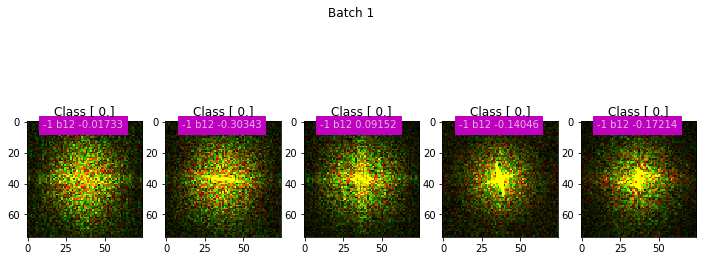

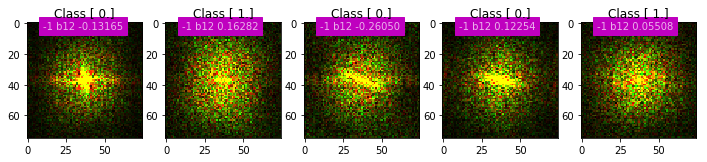

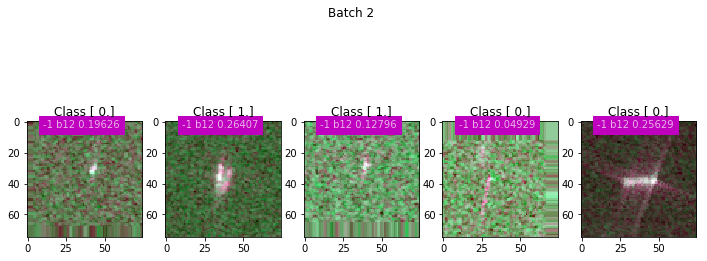

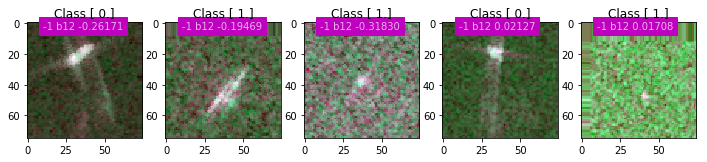

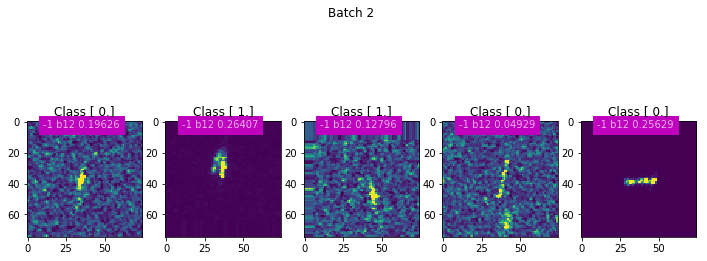

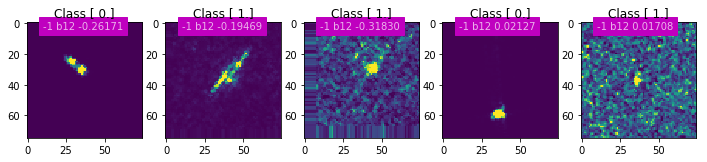

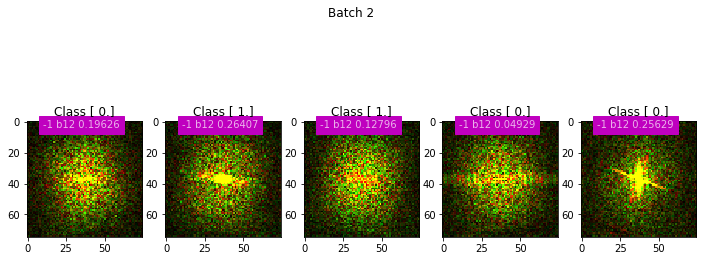

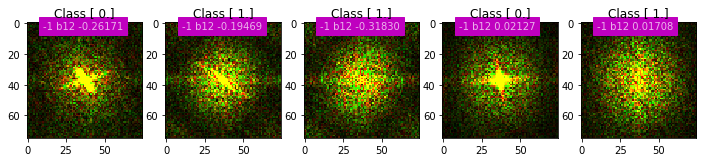

In [56]:
display_batches_(train_batches)

In [22]:
os.environ['PRETRAINED_MODELS'] = '../../../pretrained-models.pytorch/'

In [52]:
from common.models.densenet import MultiInputsDenseNet
from common.torch_common_utils.nn_utils import print_trainable_parameters

In [53]:
m = MultiInputsDenseNet()

In [25]:
print_trainable_parameters(m)

features1.0.weight torch.Size([64, 3, 3, 3])
features1.1.weight torch.Size([64])
features1.1.bias torch.Size([64])
features1.denseblock1.denselayer1.norm.1.weight torch.Size([64])
features1.denseblock1.denselayer1.norm.1.bias torch.Size([64])
features1.denseblock1.denselayer1.conv.1.weight torch.Size([128, 64, 1, 1])
features1.denseblock1.denselayer1.norm.2.weight torch.Size([128])
features1.denseblock1.denselayer1.norm.2.bias torch.Size([128])
features1.denseblock1.denselayer1.conv.2.weight torch.Size([32, 128, 3, 3])
features1.denseblock1.denselayer2.norm.1.weight torch.Size([96])
features1.denseblock1.denselayer2.norm.1.bias torch.Size([96])
features1.denseblock1.denselayer2.conv.1.weight torch.Size([128, 96, 1, 1])
features1.denseblock1.denselayer2.norm.2.weight torch.Size([128])
features1.denseblock1.denselayer2.norm.2.bias torch.Size([128])
features1.denseblock1.denselayer2.conv.2.weight torch.Size([32, 128, 3, 3])
features1.denseblock1.denselayer3.norm.1.weight torch.Size([128])

In [33]:
from common.torch_common_utils.nn_utils import apply_variable

In [34]:
batch_x_var = apply_variable(batch_x, requires_grad=True)

In [54]:
m = m.cuda()

In [55]:
y = m.forward(batch_x_var)

In [56]:
y

Variable containing:
 0.0286
 0.4877
 0.4270
-0.0563
-0.6982
-0.0477
-0.0727
-0.7963
-0.6093
 0.3546
[torch.cuda.FloatTensor of size 10x1 (GPU 0)]